In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="ticks")

df=pd.read_csv('train.csv', index_col='PassengerId')

# Context

In [2]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


### The data columns "Age, Ticket, Fare, Cabin and Embarked" are not completed.

#### **Ticket, Cabin and Name don't carry useful information for determining human survival! Because we will drop these columns.**

In [4]:
df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

#### Next, we need to replace the NaN values with the most frequent value in "Embarked" categorical column.

In [5]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

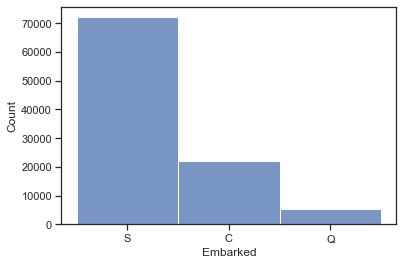

In [6]:
sns.histplot(df["Embarked"])

In [7]:
df["Embarked"].fillna('S', inplace=True)

#### Fill the NaN values to median values in 'Fare' and 'Age' columns.

In [8]:
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)

### All columns are completed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Sex       100000 non-null  object 
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Fare      100000 non-null  float64
 7   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


Categorical features: Survived, Pclass, Sex, SibSp, Parch, Embarked

Numerical features: Age, Fare

--------------------------------

In [10]:
df["Survived"] = df["Survived"].map({0: 'No', 1: 'Yes'})

<AxesSubplot:xlabel='Fare', ylabel='Count'>

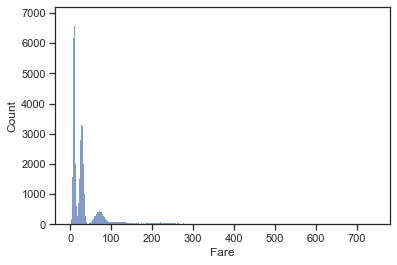

In [11]:
sns.histplot(df["Fare"])

### 'Fare' is uneven. In the following visualizations, the logarithmic representation should be used.

# Data exploration

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

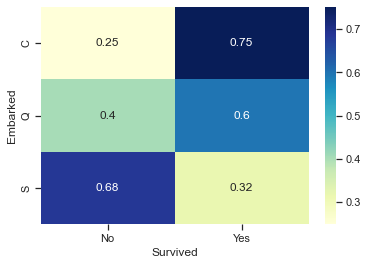

In [12]:
sns.heatmap(pd.crosstab(df["Embarked"], df["Survived"], normalize='index'), annot=True, center=0.5, cmap="YlGnBu")

### **S** Embarked has a strong advantage. And this insight cannot be considered useful.

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

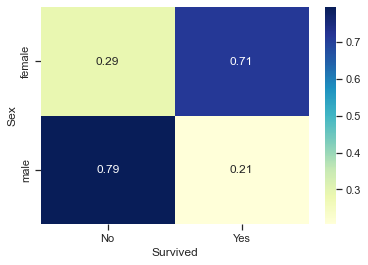

In [13]:
sns.heatmap(pd.crosstab(df["Sex"], df["Survived"], normalize='index'), annot=True, center=0.5, cmap="YlGnBu")

<AxesSubplot:xlabel='Survived', ylabel='Sex-Pclass-Embarked'>

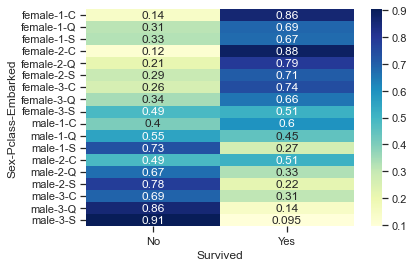

In [14]:
sns.heatmap(pd.crosstab([df['Sex'], df['Pclass'], df['Embarked']], df['Survived'], 
            rownames=['Sex', 'Pclass', 'Embarked'], 
            normalize='index'), annot=True, center=0.5, cmap="YlGnBu")

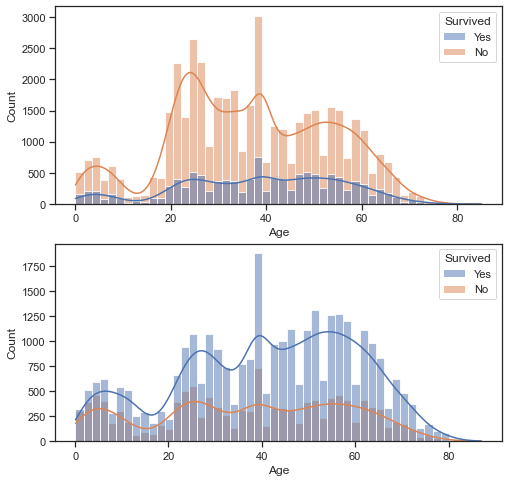

In [15]:
fig, axs = plt.subplots(2, figsize=(8, 8))

sns.histplot(data=df[df['Sex'] == 'male'], x="Age", hue="Survived", kde=True, ax=axs[0], bins=50)
sns.histplot(data=df[df['Sex'] == 'female'], x="Age", hue="Survived", kde=True, ax=axs[1], bins=50)
plt.show()

### Women are more survived regardless of 'Pclass', 'Embarked' and 'Age'.

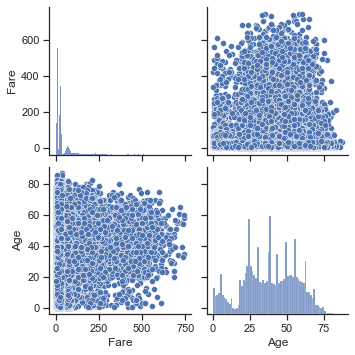

In [16]:
sns.pairplot(data=df, vars=['Fare', 'Age'])

#### 'Fare' and 'Age' are not correlated.

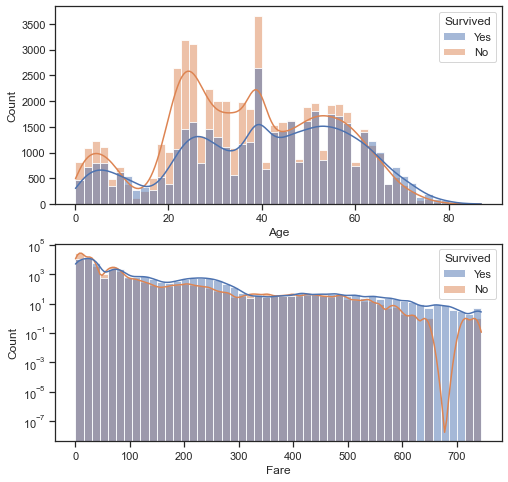

In [17]:
fig, axs = plt.subplots(2, figsize=(8, 8))

sns.histplot(data=df, x="Age", hue="Survived", kde=True, ax=axs[0], bins=50)
sns.histplot(data=df, x="Fare", hue="Survived", kde=True, ax=axs[1], bins=50)
axs[1].set_yscale('log')
plt.show()

#### Young people are less survived. And 'Survived' is regardless of 'Fare' of cruise.

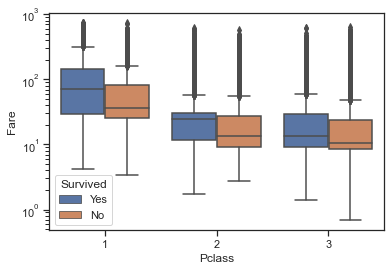

In [18]:
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Survived")
plt.yscale('log')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

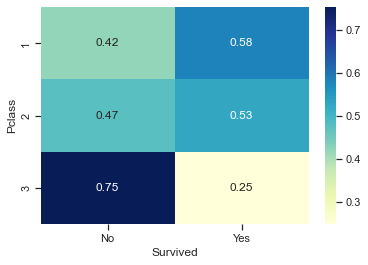

In [19]:
sns.heatmap(pd.crosstab(df["Pclass"], df["Survived"], normalize='index'), annot=True, center=0.5, cmap="YlGnBu")

### The 1st and 2nd "Pclass" are a little positive influence to "Survived". 3rd a little negative influence.

# Summary

## Sex of people is the most important characteristic for survival. Young less 'Survived' than old. 'Pclass' is less significant. 'Fare' and 'Embarked' are another two less significant characteristics.
# If you want to live, you should be a woman in **1st** 'Pclass' and **C** 'Embarked'.